In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle as pkl

from scipy.stats import gaussian_kde
import matplotlib.cm as cm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pymatgen import Composition, Element

In [25]:
# lr_mp[3] = preds
# lr_mp[7] = ground truth
# best_params, best_estimators, y_pred_train, y_pred_test, X_train_k, X_test_k, y_train_k, y_test_k, n_pts_train_k, n_pts_test_k 

In [158]:
fold = 1

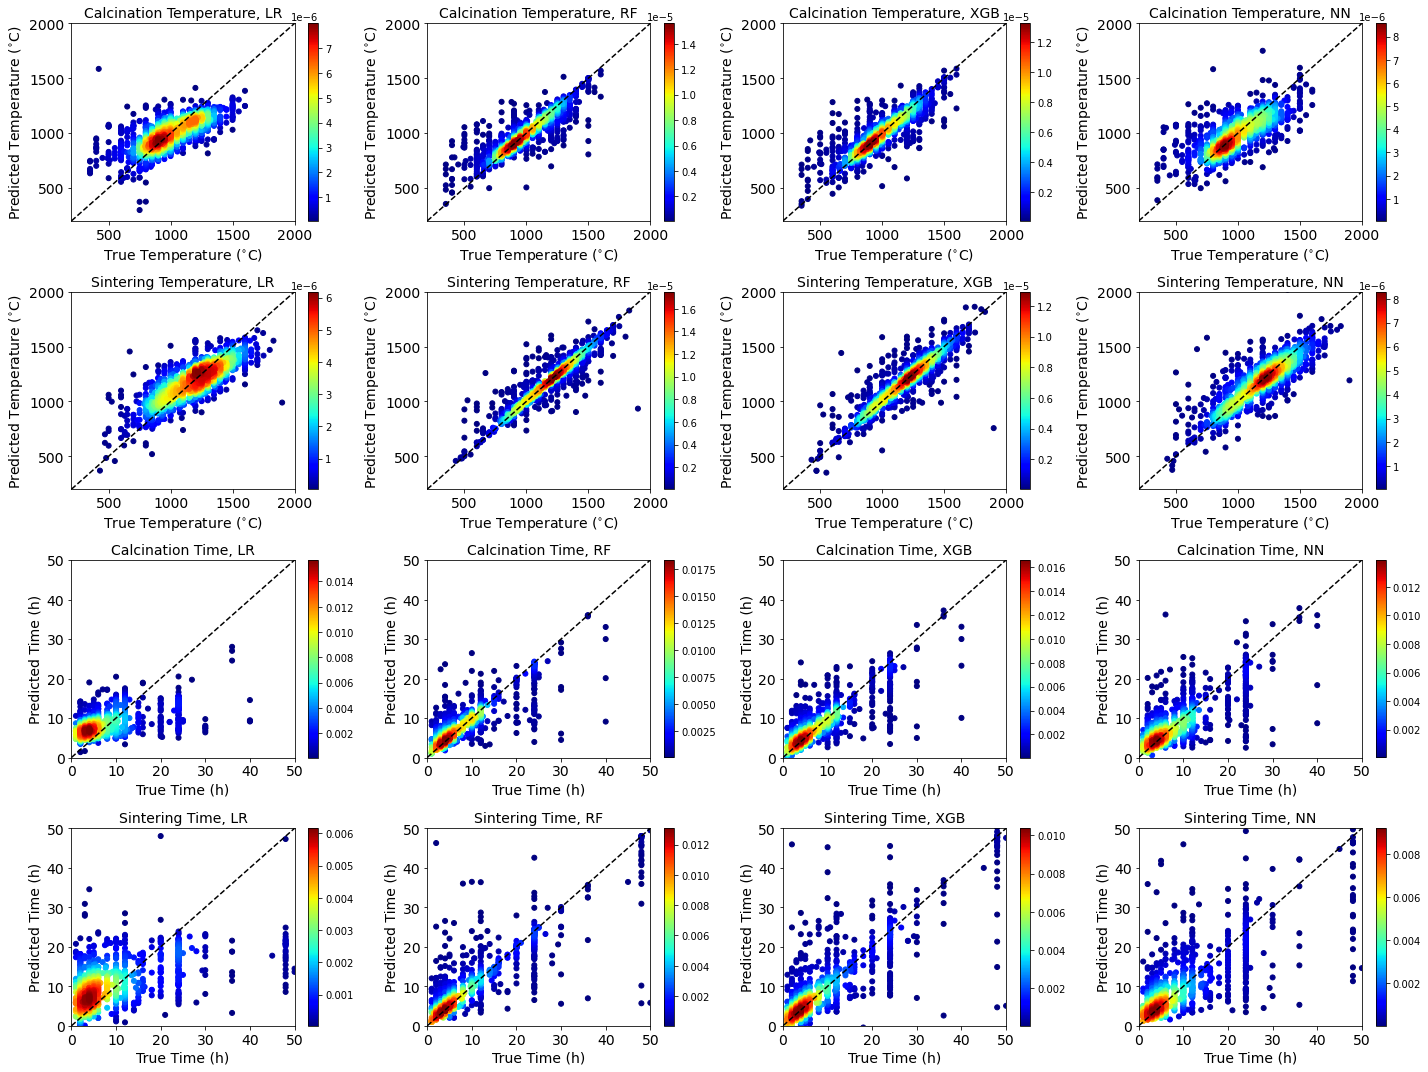

In [159]:
pretty_tasks = ["Calcination Temperature", "Sintering Temperature", "Calcination Time", "Sintering Time"]

fig, ax = plt.subplots(4, 4, figsize=(20, 15))
for i, task in enumerate(["calcine_temp", "sinter_temp", "calcine_time", "sinter_time"]):
    for j, model in enumerate(["lr", "rf", "xgb", "nn"]):
        
        with open(f'data/{model}_mp_fraction_{task}_data.pkl', 'rb') as f:
            data = pkl.load(f)
        y_pred_test = data[3]
        y_test_k = data[7]
        y_pred = y_pred_test[fold].flatten()
        y_true = y_test_k[fold].flatten()
            
        x = np.array(y_true)
        y = np.array(y_pred)
        # Calculate the point density
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

        ax_ = ax[i, j].scatter(x, y, c=z, cmap=cm.jet, s=25)
        cbar = plt.colorbar(ax_, ax=ax[i][j])
        # cbar.set_label("KDE Density", labelpad=15, fontsize=14)
        
        if i <= 1:
            ax[i, j].set_xlim(200, 2000)
            ax[i, j].set_ylim(200, 2000)
            ax[i, j].plot([200, 2000], [200, 2000], color='black', linestyle='dashed')
            ax[i, j].set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
            ax[i, j].set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
            ax[i, j].set_yticks([500, 1000, 1500, 2000])
        else:
            ax[i, j].set_xlim(0, 50)
            ax[i, j].set_ylim(0, 50)
            ax[i, j].plot([0, 50], [0, 50], color='black', linestyle='dashed')
            ax[i, j].set_xlabel("True Time (h)", fontsize=14)
            ax[i, j].set_ylabel("Predicted Time (h)", fontsize=14)
        ax[i, j].tick_params(labelsize=14)
        ax[i, j].set_title(pretty_tasks[i] + ", " + model.upper(), fontsize=14)
        
fig.tight_layout()
# fig.savefig('figures/parity_plot_comparison_mp_fraction.png', dpi=150)

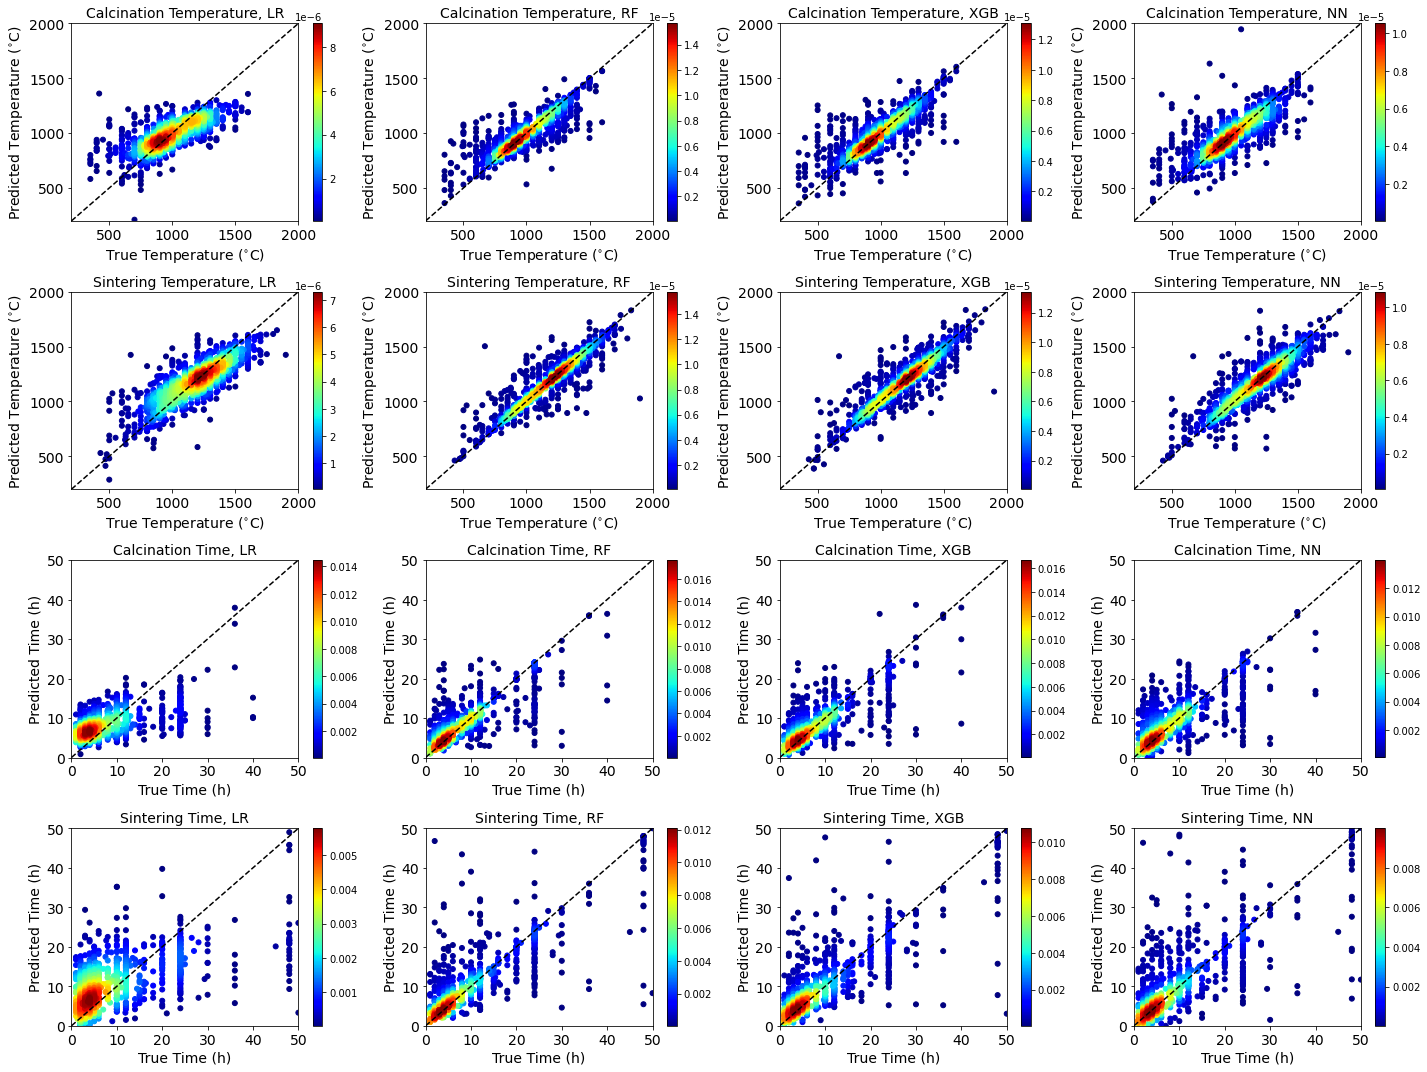

In [160]:
pretty_tasks = ["Calcination Temperature", "Sintering Temperature", "Calcination Time", "Sintering Time"]

fig, ax = plt.subplots(4, 4, figsize=(20, 15))
for i, task in enumerate(["calcine_temp", "sinter_temp", "calcine_time", "sinter_time"]):
    for j, model in enumerate(["lr", "rf", "xgb", "nn"]):
        
        with open(f'data/{model}_pca_{task}_data.pkl', 'rb') as f:
            data = pkl.load(f)
        y_pred_test = data[3]
        y_test_k = data[7]
        y_pred = y_pred_test[fold].flatten()
        y_true = y_test_k[fold].flatten()
            
        x = np.array(y_true)
        y = np.array(y_pred)
        # Calculate the point density
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

        ax_ = ax[i, j].scatter(x, y, c=z, cmap=cm.jet, s=25)
        cbar = plt.colorbar(ax_, ax=ax[i][j])
        # cbar.set_label("KDE Density", labelpad=15, fontsize=14)
        
        if i <= 1:
            ax[i, j].set_xlim(200, 2000)
            ax[i, j].set_ylim(200, 2000)
            ax[i, j].plot([200, 2000], [200, 2000], color='black', linestyle='dashed')
            ax[i, j].set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
            ax[i, j].set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
            ax[i, j].set_yticks([500, 1000, 1500, 2000])
        else:
            ax[i, j].set_xlim(0, 50)
            ax[i, j].set_ylim(0, 50)
            ax[i, j].plot([0, 50], [0, 50], color='black', linestyle='dashed')
            ax[i, j].set_xlabel("True Time (h)", fontsize=14)
            ax[i, j].set_ylabel("Predicted Time (h)", fontsize=14)
        ax[i, j].tick_params(labelsize=14)
        ax[i, j].set_title(pretty_tasks[i] + ", " + model.upper(), fontsize=14)
        
fig.tight_layout()
# fig.savefig('figures/parity_plot_comparison_pca.png', dpi=150)

# Parity plot, RF

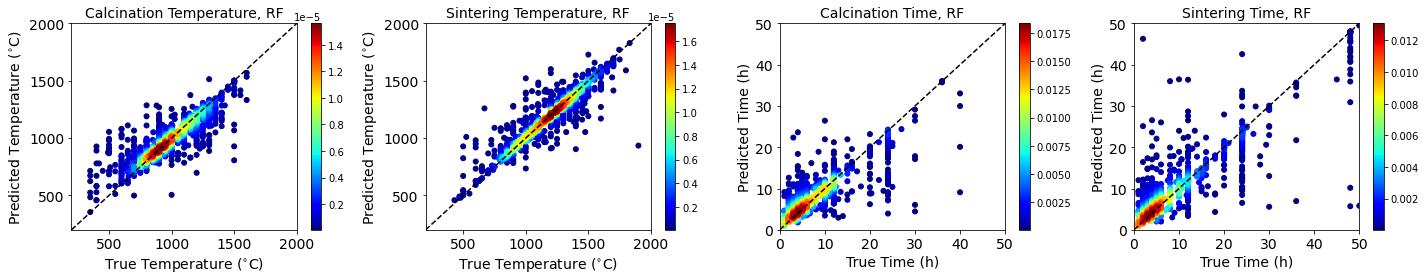

In [171]:
pretty_tasks = ["Calcination Temperature", "Sintering Temperature", "Calcination Time", "Sintering Time"]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
for i, task in enumerate(["calcine_temp", "sinter_temp", "calcine_time", "sinter_time"]):
    model = "rf"
    with open(f'data/{model}_mp_fraction_{task}_data.pkl', 'rb') as f:
        data = pkl.load(f)
    y_pred_test = data[3]
    y_test_k = data[7]
    y_pred = y_pred_test[fold].flatten()
    y_true = y_test_k[fold].flatten()

    x = np.array(y_true)
    y = np.array(y_pred)
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax_ = ax[i].scatter(x, y, c=z, cmap=cm.jet, s=25)
    cbar = plt.colorbar(ax_, ax=ax[i])
    # cbar.set_label("KDE Density", labelpad=15, fontsize=14)

    if i <= 1:
        ax[i].set_xlim(200, 2000)
        ax[i].set_ylim(200, 2000)
        ax[i].plot([200, 2000], [200, 2000], color='black', linestyle='dashed')
        ax[i].set_xlabel("True Temperature ($^{\circ}$C)", fontsize=14)
        ax[i].set_ylabel("Predicted Temperature ($^{\circ}$C)", fontsize=14)
        ax[i].set_yticks([500, 1000, 1500, 2000])
    else:
        ax[i].set_xlim(0, 50)
        ax[i].set_ylim(0, 50)
        ax[i].plot([0, 50], [0, 50], color='black', linestyle='dashed')
        ax[i].set_xlabel("True Time (h)", fontsize=14)
        ax[i].set_ylabel("Predicted Time (h)", fontsize=14)
    ax[i].tick_params(labelsize=14)
    ax[i].set_title(pretty_tasks[i] + ", " + model.upper(), fontsize=14)

fig.tight_layout()
fig.savefig('figures/parity_plot_rf_mp_fraction.png', dpi=150)

# Check error as function of num. points

In [106]:
with open('data/rf_mp_fraction_calcine_temp_data.pkl', 'rb') as f:
    calcine_temp_data = pkl.load(f)
with open('data/rf_mp_fraction_sinter_temp_data.pkl', 'rb') as f:
    sinter_temp_data = pkl.load(f)
with open('data/rf_mp_fraction_calcine_time_data.pkl', 'rb') as f:
    calcine_time_data = pkl.load(f)
with open('data/rf_mp_fraction_sinter_time_data.pkl', 'rb') as f:
    sinter_time_data = pkl.load(f)

In [153]:
# temperature

all_maes_calcine = []
all_rmses_calcine = []
all_r2_calcine = []

all_maes_sinter = []
all_rmses_sinter = []
all_r2_sinter = []

all_maes_calcine_time = []
all_rmses_calcine_time = []
all_r2_calcine_time = []

all_maes_sinter_time = []
all_rmses_sinter_time = []
all_r2_sinter_time = []


min_num_pts = [1, 2, 3, 4, 5]
for operation in ["calcine_temp", "sinter_temp", "calcine_time", "sinter_time"]:
    with open(f'data/rf_pca_{operation}_data.pkl', 'rb') as f:
        data = pkl.load(f)
    n_pts_test_k = data[9]
    y_pred_test = data[3]
    y_test_k = data[7]
    lens = []

    for i in min_num_pts:
        curr = []
        curr_true = []
        all_fold_rmse = []
        for fold in range(len(n_pts_test_k)):
            y_pred = y_pred_test[fold].flatten()
            y_true = y_test_k[fold].flatten()

            curr_fold = []
            curr_fold_true = []
            for ind in range(len(n_pts_test_k[fold])):
                if n_pts_test_k[fold][ind] >= i:
                    curr.append(y_pred[ind])
                    curr_true.append(y_true[ind])
        if operation == "calcine_temp":
            all_maes_calcine.append(mean_absolute_error(curr_true, curr))
            all_rmses_calcine.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_calcine.append(r2_score(curr_true, curr))
            lens.append(len(curr))
        elif operation == "sinter_temp":
            all_maes_sinter.append(mean_absolute_error(curr_true, curr))
            all_rmses_sinter.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_sinter.append(r2_score(curr_true, curr))
            lens.append(len(curr))
        elif operation == "calcine_time":
            all_maes_calcine_time.append(mean_absolute_error(curr_true, curr))
            all_rmses_calcine_time.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_calcine_time.append(r2_score(curr_true, curr))
            lens.append(len(curr))
        elif operation == "sinter_time":
            all_maes_sinter_time.append(mean_absolute_error(curr_true, curr))
            all_rmses_sinter_time.append(mean_squared_error(curr_true, curr, squared=False))
            all_r2_sinter_time.append(r2_score(curr_true, curr))
            lens.append(len(curr))

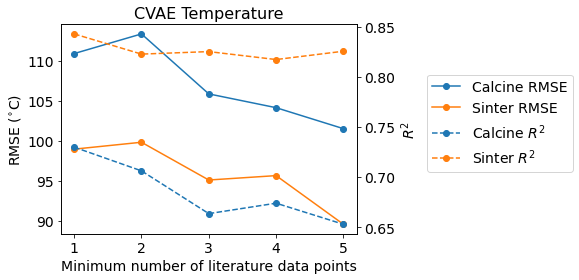

In [154]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(min_num_pts, all_rmses_calcine, marker='o', label="Calcine RMSE")
ax2.plot(min_num_pts, all_r2_calcine, marker='o', linestyle='dashed', label="Calcine $R^2$")

ax2.plot(min_num_pts, all_r2_sinter, marker='o', color='tab:orange', linestyle='dashed', label="Sinter $R^2$")
ax.plot(min_num_pts, all_rmses_sinter, marker='o', color='tab:orange', label="Sinter RMSE")

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE ($^{\circ}$C)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Temperature", fontsize=16)
fig.tight_layout()
plt.show()
# fig.savefig("figures/cvae_temperature_error_plot.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

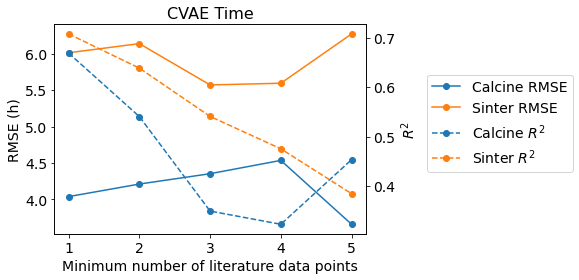

In [155]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(min_num_pts, all_rmses_calcine_time, marker='o', label="Calcine RMSE")
ax2.plot(min_num_pts, all_r2_calcine_time, marker='o', linestyle='dashed', label="Calcine $R^2$")

ax2.plot(min_num_pts, all_r2_sinter_time, marker='o', color='tab:orange', linestyle='dashed', label="Sinter $R^2$")
ax.plot(min_num_pts, all_rmses_sinter_time, marker='o', color='tab:orange', label="Sinter RMSE")

ax.set_xlabel("Minimum number of literature data points", fontsize=14)
ax.set_ylabel("RMSE (h)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel("$R^2$", fontsize=14)
lgd=fig.legend(bbox_to_anchor =(1.35, 0.75), fontsize=14)
ax.set_title("CVAE Time", fontsize=16)
fig.tight_layout()
plt.show()
# fig.savefig("figures/cvae_time_error_plot.png", dpi=150,  bbox_extra_artists=(lgd,), bbox_inches='tight')

In [143]:
sum(lens)

13385